# Cabeçalho

**Universidade Positivo**

**Nome:**  Vinícius Kruchelski Gugelmin

**Turma:** Osório - Noite - 4ª feira

# Configuração de ambiente

Importação das bibliotecas:

- Numpy: para computação numérica
- Pandas: para manipulação de dados através do alias "pd"
- Google Colab: para manipulação de arquivos no Google Drive
- Matplotlib: para criação de gráficos e visualizações de dados
- Seaborn: para visualização de dados
- Warnings: para poder alterar a visualização de warnings do sistema

E execução do comando "%matplotlib inline" para que os gráficos sejam exibidos no notebook logo abaixo da célula de código que os gerou.

In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
from matplotlib import pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

sns.set()

%matplotlib inline

Carregamento do Drive para que o notebook possa acessar os arquivos do Google Drive e com o parâmetro "force_remount=True" para que o Drive seja montado a cada execução do notebook.

In [ ]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Leitura e visualização do dataset

Leitura do dataset através da função "read_csv" do Pandas e armazenamento do resultado na variável "df".

Uso do parâmetro "sep" para informar qual o separador de colunas do arquivo e do parâmetro "encoding" para informar qual o tipo de codificação do arquivo.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/UP/Ciência de Dados/Notebooks/data/microdados_enem_2019_sp.csv',
                      sep=',', encoding='utf-8')

Exibição das 5 primeiras linhas do DataFrame através da função "head" do Pandas para verificar se o arquivo foi carregado corretamente e ter uma ideia do que ele contém.

In [ ]:
df.head()

,INSCRICAO,MUNICIPIO_RESIDENCIA,IDADE,SEXO,ESTADO_CIVIL,COR_RACA,NACIONALIDADE,CONCLUSAO,ESCOLA,TREINEIRO,...,NOTA_MT,LINGUA,STATUS_REDACAO,NOTA_COMP1,NOTA_COMP2,NOTA_COMP3,NOTA_COMP4,NOTA_COMP5,NOTA_REDACAO,Q025
0,"1,90E+11",Santa Isabel,22,M,solteiro(a),parda,brasileiro(a),ja_concluiu,nao_declarado,nao,...,600.2,ingles,sem_problemas,160.0,200.0,180.0,200.0,200.0,940.0,B
1,"1,90E+11",São Paulo,17,F,solteiro(a),parda,brasileiro(a),conclui_2019,privada,nao,...,731.8,ingles,sem_problemas,160.0,120.0,200.0,200.0,200.0,880.0,A
2,"1,90E+11",São Bernardo do Campo,19,M,solteiro(a),parda,brasileiro(a),conclui_2019,publica,nao,...,393.2,espanhol,sem_problemas,80.0,160.0,120.0,100.0,100.0,560.0,B
3,"1,90E+11",Embu-Guaçu,17,F,solteiro(a),parda,brasileiro(a),conclui_2019,publica,nao,...,419.2,ingles,sem_problemas,120.0,120.0,120.0,120.0,80.0,560.0,B
4,"1,90E+11",Guarulhos,23,F,solteiro(a),branca,brasileiro(a),ja_concluiu,nao_declarado,nao,...,796.1,ingles,sem_problemas,160.0,200.0,180.0,180.0,160.0,880.0,B


# Criação de funções utilitárias

In [ ]:
def contLinhasDfFormatado(_df):
  aux = f'{len(_df):_.0f}'
  aux = aux.replace('.', ',')
  return aux.replace('_', '.')

# Perguntas iniciais

- Quantas pessoas fizeram a prova?

In [ ]:
cont_df = contLinhasDfFormatado(df)

print("Total:", cont_df)

Total: 581.171


É importante analisar primeiramente qual a quantidade de dados estamos para analisar

- Quantas pessoas do sexo masculino (M) e feminino (F) fizeram a prova?

In [ ]:
df_m = df[df['SEXO'] == "M"]
df_f = df[df['SEXO'] == "F"]

print("M:", contLinhasDfFormatado(df_m))
print("F:", contLinhasDfFormatado(df_f))


M: 241.201
F: 339.970


Verifico se há uma grande diferença ou não entre o sexo dos participantes.

- Qual a porcentagem de homens e mulheres que fizeram a prova?

In [ ]:
porcentagem_m = (len(df_m)/len(df))*100
porcentagem_f = (len(df_f)/len(df))*100

print("Porcentagem de homens:", f'{porcentagem_m:.1f}%')
print("Porcentagem de mulheres:", f'{porcentagem_f:.1f}%')

Porcentagem de homens: 41.5%
Porcentagem de mulheres: 58.5%


Percebo que não, mas acho interessante ressaltar essa diferença pendendo para o lado das mulheres.

- Qual a idade da pessoa mais velha e mais nova que fizeram a prova?

In [ ]:
maior_idade = df['IDADE'].max()
menor_idade = df['IDADE'].min()

print("Mais velha:", maior_idade, "anos")
print("Mais nova:", menor_idade, "anos")

Mais velha: 91 anos
Mais nova: 12 anos


Tento analisar então um pouco da idade dos participantes, notando um "range" enorme do mais velho para o mais novo.

- Quantos menores de 18 anos fizeram a prova?

In [ ]:
df_menores_idade = df[df['IDADE'] < 18]

print("Menores de idade:", contLinhasDfFormatado(df_menores_idade))

Menores de idade: 247.613


Ressaltando ainda mais com a quantidade de participantes menores de 18 anos.

- Qual a porcentagem de menores de idade que fizeram a prova?

In [ ]:
porcentagem_menor_idade = (len(df_menores_idade)/len(df))*100

print("Porcentagem de menores de idade:", f'{porcentagem_menor_idade:.1f}%')

Porcentagem de menores de idade: 42.6%


E agora com a porcentagem acima.

# Visualização dos dados

- Visualização dos dados já apresentados com a disparidade de menores de idade realizando o ENEM através de histograma usando o método **sturges** para determinar o número de intervalos.

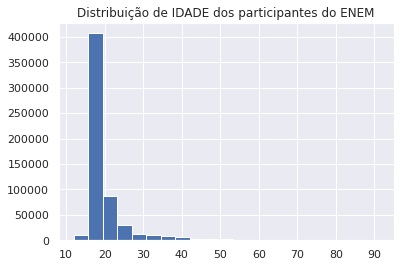

In [ ]:
bins = np.histogram_bin_edges(df.IDADE, bins='sturges')
bins

df["IDADE"].hist(bins=bins)
plt.title('Distribuição de IDADE dos participantes do ENEM')
plt.show()   

- Visualização dos dados já apresentados com o percentual de homens e mulheres que realizaram o ENEM através do **seaborn**.

[Text(0.5, 1.0, 'Pecentual de homens e mulheres no ENEM')]

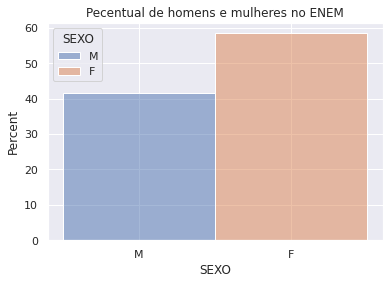

In [ ]:
sns.histplot(data=df, x="SEXO", hue="SEXO", stat="percent").set(title='Pecentual de homens e mulheres no ENEM')